<a href="https://colab.research.google.com/github/kevin-rego/PCA/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


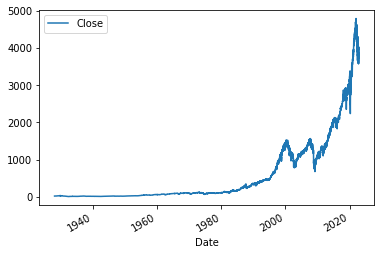

In [ ]:
!pip install yfinance
import pandas as pd
import os
import yfinance as yf

if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")
sp500.index = pd.to_datetime(sp500.index)
sp500
sp500.plot.line(y="Close", use_index=True)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0
...,...,...,...,...,...,...,...
2022-11-18 00:00:00-05:00,3966.389893,3979.889893,3935.979980,3965.340088,4037360000,0,0
2022-11-21 00:00:00-05:00,3956.229980,3962.000000,3933.340088,3949.939941,3850690000,0,0
2022-11-22 00:00:00-05:00,3965.510010,4005.879883,3956.879883,4003.580078,3887990000,0,0


In [ ]:
del sp500["Dividends"]
del sp500["Stock Splits"]
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-11-18 00:00:00-05:00,3966.389893,3979.889893,3935.979980,3965.340088,4037360000,3949.939941,0
2022-11-21 00:00:00-05:00,3956.229980,3962.000000,3933.340088,3949.939941,3850690000,4003.580078,1
2022-11-22 00:00:00-05:00,3965.510010,4005.879883,3956.879883,4003.580078,3887990000,4027.260010,1


In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['Open', 'High', 'Low', 'Close', 'Volume']

In [ ]:
x = sp500.loc[:, features].values
x

array([[3.53399994e+02, 3.59690002e+02, 3.51980011e+02, 3.59690002e+02,
        1.62070000e+08],
       [3.59690002e+02, 3.60589996e+02, 3.57890015e+02, 3.58760010e+02,
        1.92330000e+08],
       [3.58760010e+02, 3.58760010e+02, 3.52890015e+02, 3.55670013e+02,
        1.77000000e+08],
       ...,
       [3.96551001e+03, 4.00587988e+03, 3.95687988e+03, 4.00358008e+03,
        3.88799000e+09],
       [4.00030005e+03, 4.03378003e+03, 3.99865991e+03, 4.02726001e+03,
        3.27972000e+09],
       [4.02334009e+03, 4.03402002e+03, 4.02076001e+03, 4.02612012e+03,
        1.70646000e+09]])

In [ ]:
y = sp500.loc[:,['Target']].values
y
x = StandardScaler().fit_transform(x)
x

array([[-1.15302047, -1.14936828, -1.15170197, -1.14691317, -1.21276567],
       [-1.14667003, -1.14846461, -1.14569906, -1.14785207, -1.19642087],
       [-1.14760896, -1.15030208, -1.15077766, -1.15097167, -1.2047013 ],
       ...,
       [ 2.49379095,  2.51174406,  2.50986687,  2.53189173,  0.79977228],
       [ 2.52891522,  2.53975839,  2.55230369,  2.55579856,  0.47121813],
       [ 2.5521766 ,  2.53999936,  2.5747512 ,  2.55464774, -0.37857076]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-2.573423,-0.374958
1,-2.562160,-0.361622
2,-2.570097,-0.367583
3,-2.578750,-0.375107
4,-2.584031,-0.383795
...,...,...
8286,4.989216,-0.833387
8287,4.933653,-0.920718
8288,5.002355,-0.923637
8289,4.953668,-1.254989


In [ ]:
df_y = pd.DataFrame(y, columns = ['Target'])
df_y

finalDf = pd.concat([principalDf,df_y],axis=1)
finalDf

,principal component 1,principal component 2,Target
0,-2.573423,-0.374958,0
1,-2.562160,-0.361622,0
2,-2.570097,-0.367583,0
3,-2.578750,-0.375107,1
4,-2.584031,-0.383795,0
...,...,...,...
8286,4.989216,-0.833387,0
8287,4.933653,-0.920718,1
8288,5.002355,-0.923637,1
8289,4.953668,-1.254989,0


In [ ]:
pca.explained_variance_ratio_
pca.explained_variance_ 

array([4.43071326, 0.56960589])

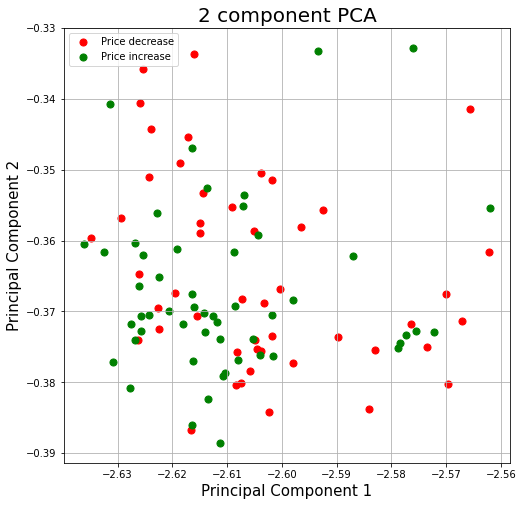

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
df_small = finalDf.iloc[:-8190]
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
index = 0
for target, color in zip(targets,colors):
    indicesToKeep = df_small['Target'] == target
    ax.scatter(df_small.loc[indicesToKeep, 'principal component 1']
               , df_small.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.legend(['Price decrease', 'Price increase'])
ax.grid()